Math 150 Module 3 Group 2D: Ivan Huang, Henry Guo, Porfirio Montoya, Ryan Milstrey, and Aaron Romero

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
import statsmodels.api as sm
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.formula.api import ols
from scipy.stats import linregress



<h2>Module 3, Assignment 17</h2>

<h3>Part 1: Read the mario data</h3>

In [4]:
data_file = "mario_file.json"
with open(data_file, 'r') as mario_file:
    data = json.loads(mario_file.read())

print(f"Number of items: {len(data)}")

# Response variable
likes = []
boos = []

# Predictor variables
plays = []
attempts = []

for item in data:
    # Direct dictionary access (same style as your example)
    i_likes = item["likes"]
    i_boos = item["boos"]
    i_plays = item["plays"]
    i_attempts = item["attempts"]
    
    # Same upper bound filtering as your original
    upper_bound = 10**5
    if i_likes > upper_bound or i_boos > upper_bound or i_plays > upper_bound or i_attempts > upper_bound:
        continue
        
    likes.append(i_likes)
    boos.append(i_boos)
    plays.append(i_plays)
    attempts.append(i_attempts)

# Convert to numpy arrays (identical to your style)
likes = np.array(likes)
boos = np.array(boos)
plays = np.array(plays)
attempts = np.array(attempts)

# Verification output
print(f"\nFiltered dataset size: {len(likes)}")
print("First 5 entries:")
print(f"Likes:  {likes[:5]}")
print(f"Disikes:  {boos[:5]}")
print(f"Plays:  {plays[:5]}")
print(f"Attempts: {attempts[:5]}")

Number of items: 20001

Filtered dataset size: 19945
First 5 entries:
Likes:  [152   4 131 294  40]
Disikes:  [118   6 123  27  45]
Plays:  [1704   63  818 2388  396]
Attempts: [3168  153 2553 3990 5222]


<h3>Part 2: Plot Mario Data Predictors vs Likes</h3>

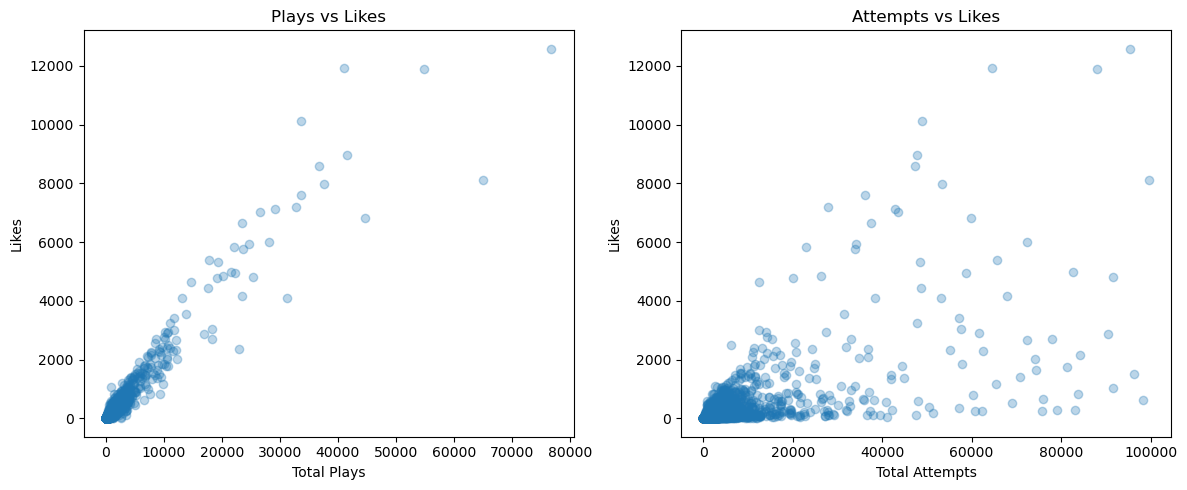

In [3]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(plays, likes, alpha=0.3)
plt.title("Plays vs Likes")
plt.xlabel("Total Plays")
plt.ylabel("Likes")

plt.subplot(1, 2, 2)
plt.scatter(attempts, likes, alpha=0.3)
plt.title("Attempts vs Likes")
plt.xlabel("Total Attempts")
plt.ylabel("Likes")

plt.tight_layout()
plt.show()

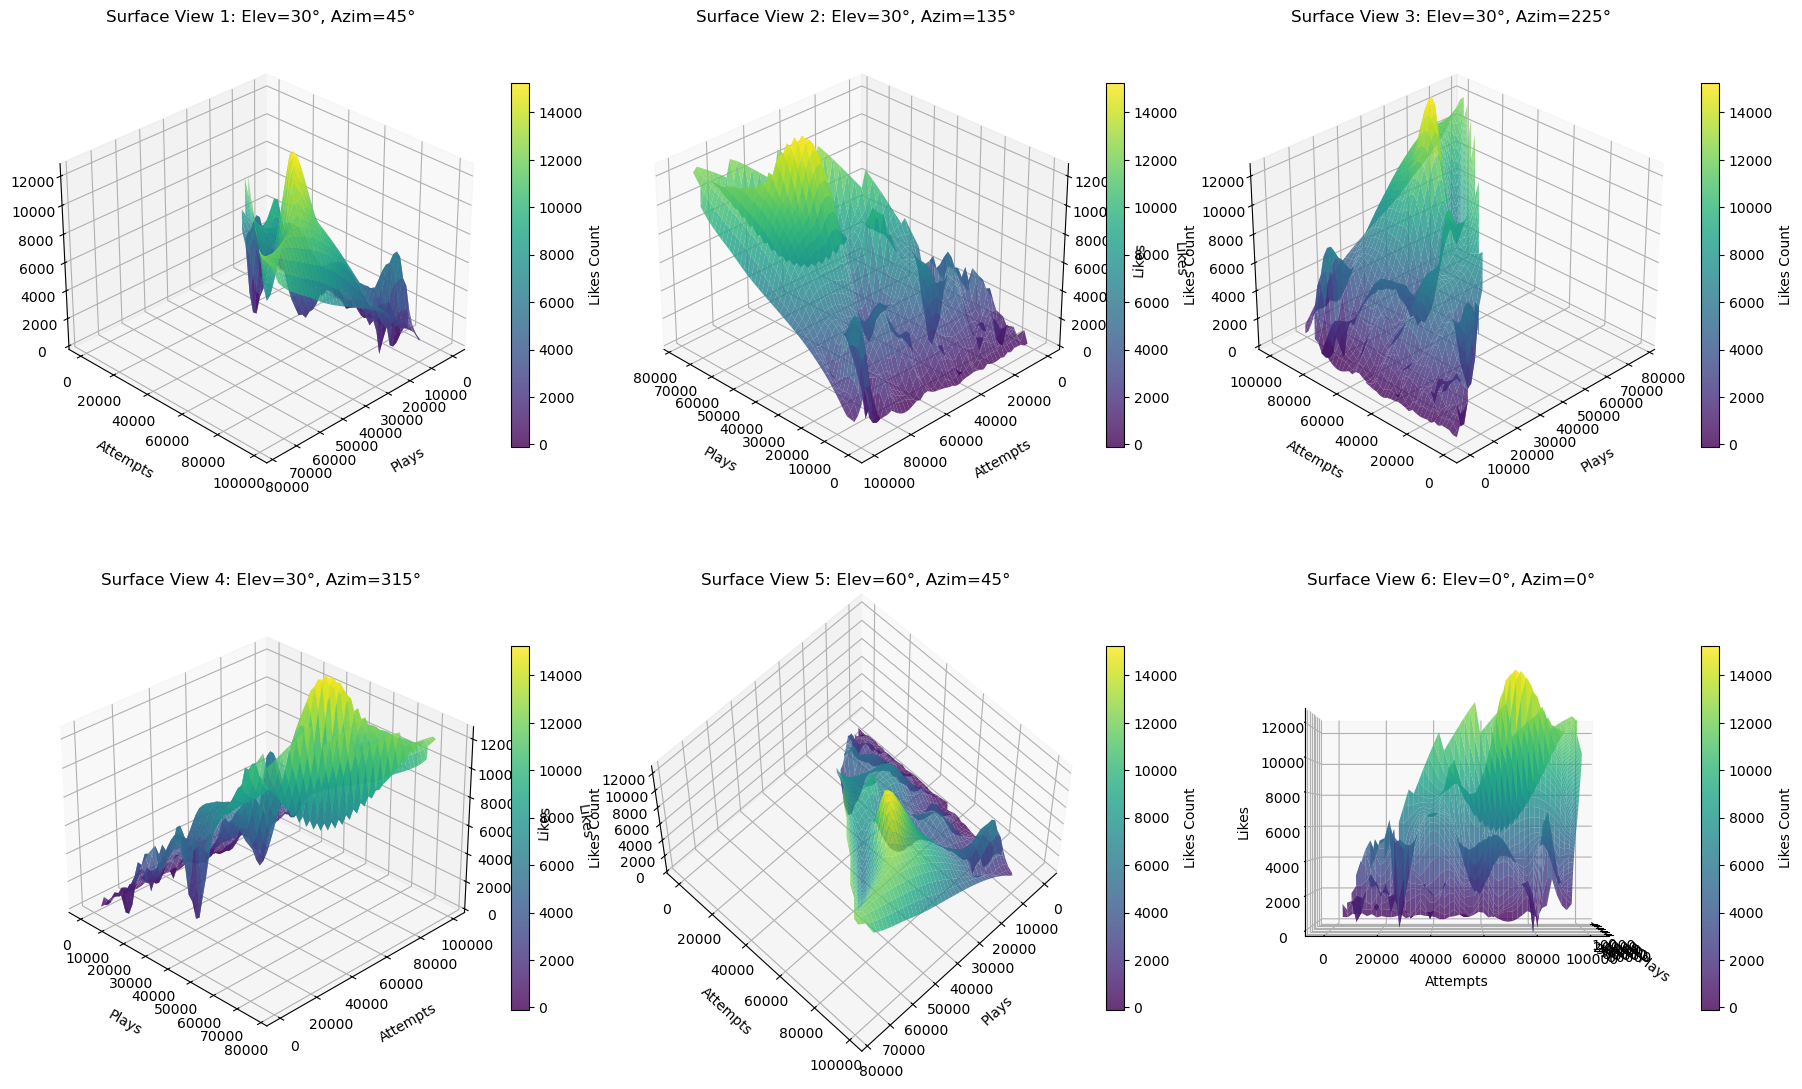

In [4]:
# Create figure with multiple subplots
fig = plt.figure(figsize=(18, 12))

# Define viewing angles (elevation, azimuth)
angles = [
    (30, 45),   # Standard view
    (30, 135),  # Rotated view
    (30, 225),  # Opposite side view
    (30, 315),  # Final rotated view
    (60, 45),   # Higher elevation
    (0, 0)      # Top-down view
]

# Create grid for surface plot
grid_points = 50  # Resolution of the surface
x_grid = np.linspace(min(plays), max(plays), grid_points)
y_grid = np.linspace(min(attempts), max(attempts), grid_points)
X, Y = np.meshgrid(x_grid, y_grid)

# Interpolate likes onto the grid
Z = griddata((plays, attempts), likes, (X, Y), method='cubic')

# Create all subplots
for i, (elev, azim) in enumerate(angles, 1):
    ax = fig.add_subplot(2, 3, i, projection='3d')
    
    # Create the surface plot
    surf = ax.plot_surface(
        X, Y, Z,
        cmap='viridis',
        alpha=0.8,
        linewidth=0,
        antialiased=True,
        rstride=1,
        cstride=1
    )
    
    # Set labels and title
    ax.set_xlabel('Plays', labelpad=10)
    ax.set_ylabel('Attempts', labelpad=10)
    ax.set_zlabel('Likes', labelpad=10)
    ax.set_title(f'Surface View {i}: Elev={elev}°, Azim={azim}°', pad=15)
    
    # Set viewing angle
    ax.view_init(elev=elev, azim=azim)
    
    # Add colorbar
    cbar = plt.colorbar(surf, ax=ax, shrink=0.6)
    cbar.set_label('Likes Count')

    # Set z-axis limits
    ax.set_zlim(min(likes), max(likes))

plt.tight_layout()
plt.show()

<h3>Part 2: Plot Mario Data Predictors vs boos</h3>

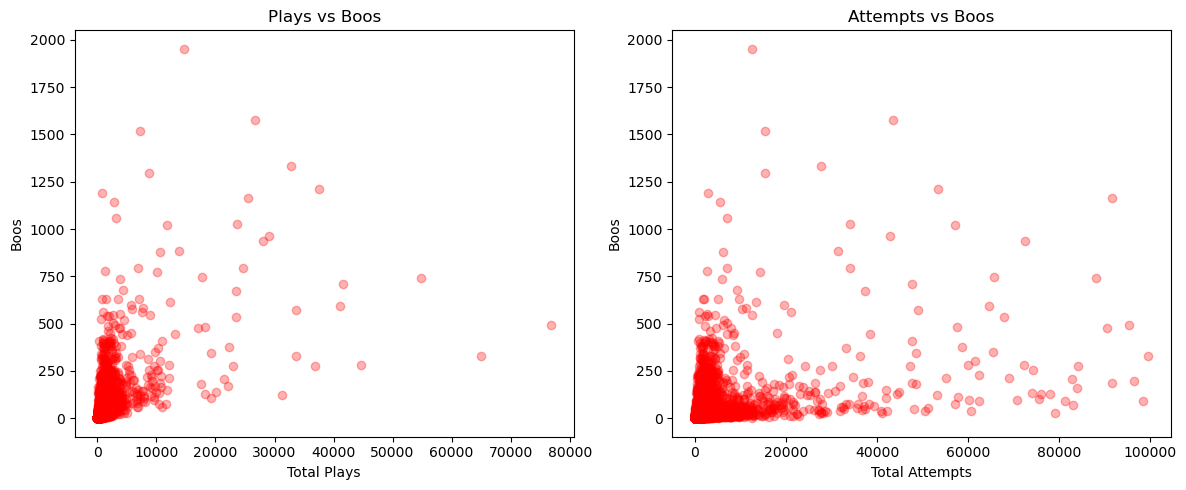

In [5]:
# Create the plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(plays, boos, alpha=0.3, color='red')
plt.title("Plays vs Boos")
plt.xlabel("Total Plays")
plt.ylabel("Boos")

plt.subplot(1, 2, 2)
plt.scatter(attempts, boos, alpha=0.3, color='red')
plt.title("Attempts vs Boos")
plt.xlabel("Total Attempts")
plt.ylabel("Boos")

plt.tight_layout()
plt.show()

<h3>Part 2: Plot Mario Data Paired Predictors And boos</h3>

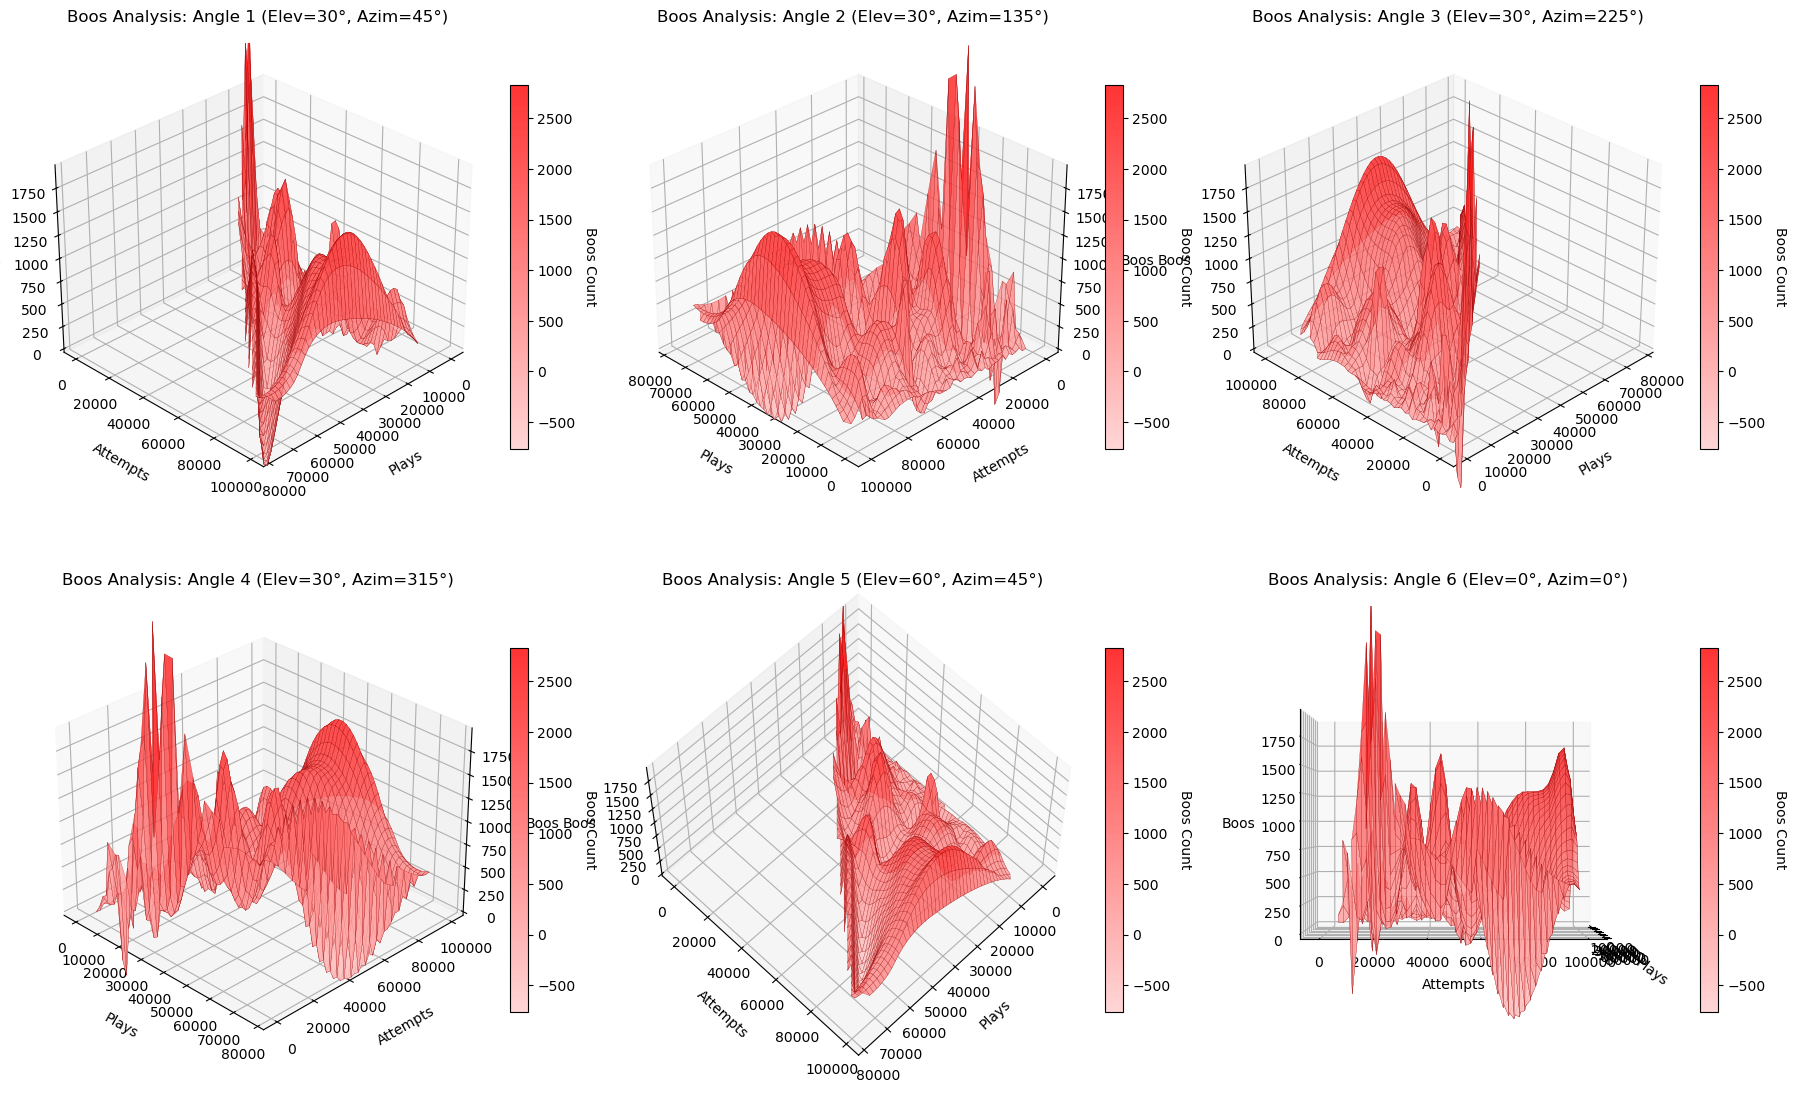

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import griddata
from matplotlib.colors import LinearSegmentedColormap

# Create custom red colormap
red_cmap = LinearSegmentedColormap.from_list('red_cmap', ['#ffcccc', '#ff0000'])

# Create figure with multiple subplots
fig = plt.figure(figsize=(18, 12))

# Define viewing angles (elevation, azimuth)
angles = [
    (30, 45),   # Standard view
    (30, 135),  # Rotated view
    (30, 225),  # Opposite side view
    (30, 315),  # Final rotated view
    (60, 45),   # Higher elevation
    (0, 0)      # Top-down view
]

# Create grid for surface plot
grid_points = 50  # Resolution of the surface
x_grid = np.linspace(min(plays), max(plays), grid_points)
y_grid = np.linspace(min(attempts), max(attempts), grid_points)
X, Y = np.meshgrid(x_grid, y_grid)

# Interpolate boos onto the grid
Z = griddata((plays, attempts), boos, (X, Y), method='cubic')

# Create all subplots
for i, (elev, azim) in enumerate(angles, 1):
    ax = fig.add_subplot(2, 3, i, projection='3d')
    
    # Create the surface plot with red colormap
    surf = ax.plot_surface(
        X, Y, Z,
        cmap=red_cmap,      # Using custom red colormap
        alpha=0.8,          # Slightly transparent
        linewidth=0.2,      # Thin wireframe lines
        antialiased=True,
        rstride=1,
        cstride=1,
        edgecolor='#990000'  # Dark red edges
    )
    
    # Set labels and title
    ax.set_xlabel('Plays', labelpad=10)
    ax.set_ylabel('Attempts', labelpad=10)
    ax.set_zlabel('Boos', labelpad=10)
    ax.set_title(f'Boos Analysis: Angle {i} (Elev={elev}°, Azim={azim}°)', pad=15)
    
    # Set viewing angle
    ax.view_init(elev=elev, azim=azim)
    
    # Add colorbar
    cbar = plt.colorbar(surf, ax=ax, shrink=0.6)
    cbar.set_label('Boos Count', rotation=270, labelpad=15)

    # Set consistent z-axis limits
    ax.set_zlim(min(boos), max(boos))

plt.tight_layout()
plt.show()

<h3>Box 1: Background</h3>

<h4>
Overall we have chosen to work with this data as we are interested in studying the Mario Maker data as it can provide insights on what types of interactions best help us determine positive player engagement although we may find it interesting to understand overall engagement as there are negative expectations which may be included in more depth later on.
    
This kind of analysis has resembles algortihms within social media, which are largely a complete mystery to the people who use them, though they exert major influence over our lives. The dataset explores the relationship between Super Mario Maker 2 level popularity (measured by likes may include boos in depth later on) and two key engagement metrics: total plays (how often a level was played) and total attempts (how many tries players needed to complete it).

According to <a href="https://www.pewresearch.org/internet/2024/02/22/how-u-s-adults-use-tiktok/">Pew Research</a>, "Some 85% of TikTok users say the content on their “For You” page is at least somewhat interesting, including 40% who call it either extremely or very interesting. Only 14% say it is not too or not at all interesting." Most people using these applications are primarily consuming content served to them by the algorithm, so it would be interesting to gain insight into how a social media algorithm may select content for its users.
</h4>

<h3>Box 2: Description of Data</h3>

<h4>
From the scatter plots comparing the predictor variables and likes with boos more in depth later on, we see that the plays plot shows a strong positve correlation where levels consisting of higher play counts recieve more likes, but seems more spread out from 40000 and on so popularity shouldn;t solely depend on plays. As for the attempts plot, the pattern is more spread it seems there are cluster with fewer attempts most likely due to the ease of the level resulting in an overall satisfaction but with more attempts the spread expands and it seems more nuanced within the 20000 to 60000 range while higher attempts have sparce likes in comparison to the clusters before it. Overall this should imply the blanced levels attracting more attention therefore more likes and popularity.
    
The 3D visualizations from multiple angles further highlights the predictors' interactions. The Angle 6 view confirms that most data points cluster in moderate ranges for both plays and attempts, with outliers showing exceptionally high plays but middling likes. Angles 1–4 illustrate that the highest-like levels occupy a spot in the middle of both predictors. While the Angle 5 emphasizes how few levels achieve both high plays and high attempts. Together, these observations suggest that while plays drive visibility, sustained popularity depends on a level’s ability to maintain a clear rate that feels rewarding without being trivial or punishing.
    
We also need to take into account the potential outliers levels with high plays but low likes as they might represent popular or viral levels that players try once but don’t favor, while high attempt, low like levels could be overly difficult. These insights could guide level design, emphasizing balanced difficulty and replayability to maximize likes.
</h4>

<h2>Module 3, Assignment 18</h2>

Box 1: Conduct a simple linear regression on each predictor and response pair. For each pair create a table that includes the parameter estimates, standard errors, t-statistics, and p-values. The pairs are plays and likes, attempts and likes, plays and boos, and attempts and boos.

In [8]:
import pandas as pd
import statsmodels.api as sm

# Prepare the data pairs
pairs = [
    ('plays', 'likes'),
    ('attempts', 'likes'),
    ('plays', 'boos'),
    ('attempts', 'boos')
]

# Function to run regression and return statistics
def run_regression(x, y):
    x = sm.add_constant(x)  # Adds intercept term
    model = sm.OLS(y, x)
    results = model.fit()
    return results

# Store all results
regression_results = []

for predictor, response in pairs:
    x = globals()[predictor]
    y = globals()[response]
    
    results = run_regression(x, y)
    
    regression_results.append({
        'Predictor': predictor,
        'Response': response,
        'Intercept': results.params[0],
        'Intercept_StdErr': results.bse[0],
        'Slope': results.params[1],
        'Slope_StdErr': results.bse[1],
        't-statistic': results.tvalues[1],
        'p-value': results.pvalues[1],
        'R-squared': results.rsquared
    })

# Create a nicely formatted table
results_df = pd.DataFrame(regression_results)
cols = ['Predictor', 'Response', 'Intercept', 'Intercept_StdErr', 
        'Slope', 'Slope_StdErr', 't-statistic', 'p-value', 'R-squared']
results_df = results_df[cols]

# Display the results
print("Regression Results:")
print(results_df.to_string(float_format="%.4f", index=False))

Regression Results:
Predictor Response  Intercept  Intercept_StdErr  Slope  Slope_StdErr  t-statistic  p-value  R-squared
    plays    likes   -20.6367            0.6560 0.2044        0.0004     483.8354   0.0000     0.9215
 attempts    likes    -0.2234            1.7549 0.0501        0.0004     126.7469   0.0000     0.4461
    plays     boos    12.1576            0.3360 0.0215        0.0002      99.2751   0.0000     0.3307
 attempts     boos    13.9333            0.3751 0.0056        0.0001      65.6884   0.0000     0.1779


Box 2: I can see that Plays vs. Likes shows the strongest relationship as R² = 0.9215, which tells us that 92% of the variation in likes is explained by plays. Attempts vs. Likes and Plays vs. Boos have moderate relationship as their respective R² = 0.4461 and 0.3307 so they aren't as useful in explaining likes.
Although Attempts vs. Boos has the weakest relationship with R² = 0.1779. In addition all slopes are positive, this implies the reationship where more plays/attempts results in more likes and more boos.
Though from what was observed, the effect is much stronger for likes than boos.The intercepts for likes suggests that the model predicts negative likes at zero plays which is unrealistic, implying the linear model's fit to be inaccurate at very low play counts. Similarly positive intercepts for boos imply levels start with a baseline of boos even with zero plays. For the plays vs likes, the slope tells us that each play corresponds to around 1/5 more likes, and an intercept of -20 implies dislikes as it should in some sense cancel the likes as -20 likes at no plays should be impossible. As for attempts and likes a slope of 0.05 corresponds to around 1/20 more likes per play, and the intercept of -0.22, much like the previous comparison should be impossible but overall it seems plays help predict likability rather than attempts. 
The p-values, inform us of that the relationships are significant as all p-values are 0.0000 but that is unlikely so it should be implied that, p < 0.0001)so there should be strong evidence against the null hypothesis towards the slope being 0. The t-statistics, are large with like being larger in comparison to boos, this should tell us that the slope estimates are many standard deviations away from zero, and the higher the t-statistics the more reliable estimates should be.

Box 3: Choosing the plays and likes pair, we will make predictions across a set of 20 predictor values that should be random. Also comput ethe 95% confidence intervals for those predicted values. Plot the data and the predictions and the confidence intervals on a single plot.

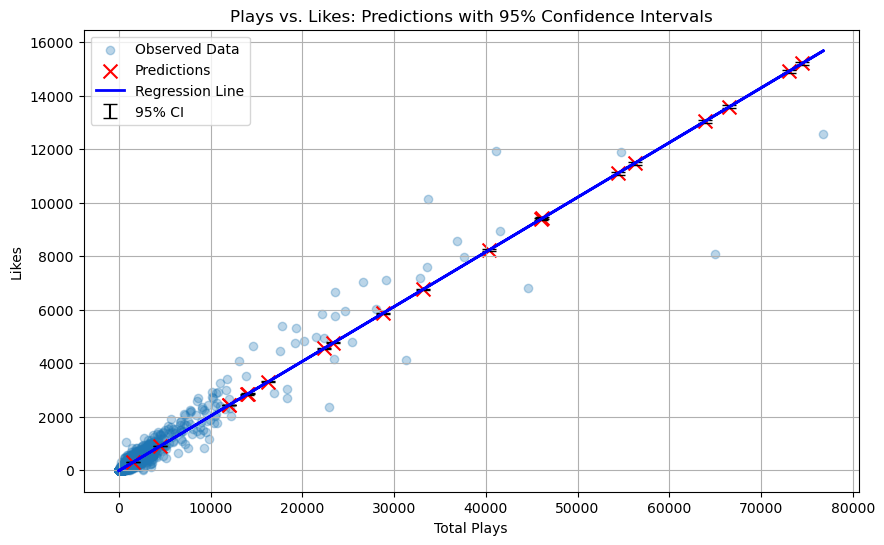


Prediction Table:
   Plays  Predicted Likes  CI Lower  CI Upper
28770.43          5859.15   5835.65   5882.66
73021.76         14902.76  14842.64  14962.88
56223.60         11469.73  11423.52  11515.95
45983.17          9376.91   9339.16   9414.65
11987.54          2429.25   2419.59   2438.91
11985.69          2428.87   2419.21   2438.53
 4465.94           892.06    888.49    895.64
66529.06         13575.85  13521.10  13630.60
46171.84          9415.46   9377.56   9453.36
54386.39         11094.27  11049.57  11138.96
 1585.93           303.48    301.91    305.05
74496.02         15204.05  15142.71  15265.40
63938.26         13046.37  12993.77  13098.98
16313.07          3313.25   3300.03   3326.47
13969.52          2834.30   2823.02   2845.59
14090.83          2859.10   2847.71   2870.48
23371.41          4755.76   4736.72   4774.80
40307.34          8216.94   8183.89   8249.99
33179.24          6760.18   6733.03   6787.33
22371.98          4551.51   4533.29   4569.72


In [5]:
# 1. Fit the regression model (plays vs. likes)
X = sm.add_constant(plays)  # Add intercept
model = sm.OLS(likes, X).fit()

# 2. Generate 20 random predictor values within the observed range
np.random.seed(42)  # For reproducibility
random_plays = np.random.uniform(min(plays), max(plays), 20)

# 3. Make predictions and get confidence intervals
X_pred = sm.add_constant(random_plays)  # Add intercept to new data
predictions = model.get_prediction(X_pred)
predicted_values = predictions.predicted_mean
confidence_intervals = predictions.conf_int(alpha=0.05)  # 95% CIs

# 4. Create the plot
plt.figure(figsize=(10, 6))

# Original data
plt.scatter(plays, likes, alpha=0.3, label='Observed Data')

# Predictions and CIs
plt.scatter(random_plays, predicted_values, color='red', s=100, 
            label='Predictions', marker='x')
plt.errorbar(random_plays, predicted_values, 
             yerr=(predicted_values - confidence_intervals[:, 0]),
             fmt='none', color='black', capsize=5, label='95% CI')

# Regression line
plt.plot(plays, model.predict(X), color='blue', linewidth=2, 
         label='Regression Line')

# Formatting
plt.title('Plays vs. Likes: Predictions with 95% Confidence Intervals')
plt.xlabel('Total Plays')
plt.ylabel('Likes')
plt.legend()
plt.grid(True)
plt.show()

# 5. Print prediction table
print("\nPrediction Table:")
print(pd.DataFrame({
    'Plays': random_plays,
    'Predicted Likes': predicted_values,
    'CI Lower': confidence_intervals[:, 0],
    'CI Upper': confidence_intervals[:, 1]
}).round(2).to_string(index=False))

Box 4: Conduct a multiple linear regression using both the plays and attempts predictors and the likes response. Create a table that includes the parameter estimates, standard errors, t-statistics, and p-values. Compute the RSE and R2 values.

In [6]:
# Prepare the data
X = sm.add_constant(np.column_stack((plays, attempts)))  # Add intercept + predictors
y = likes

# Fit the model
model = sm.OLS(y, X).fit()

# Extract key statistics
results = {
    'Parameter': ['Intercept', 'Plays', 'Attempts'],
    'Estimate': model.params,
    'Std_Error': model.bse,
    't-statistic': model.tvalues,
    'p-value': model.pvalues
}

# Create summary table
results_df = pd.DataFrame(results)
rse = np.sqrt(model.mse_resid)  # Residual Standard Error (RSE)
r_squared = model.rsquared

# Display results
print("Multiple Regression Results:")
print(results_df.to_string(float_format="%.4f", index=False))
print(f"\nResidual Standard Error (RSE): {rse:.2f}")
print(f"R-squared: {r_squared:.4f}")

Multiple Regression Results:
Parameter  Estimate  Std_Error  t-statistic  p-value
Intercept  -19.9340     0.6623     -30.0992   0.0000
    Plays    0.2074     0.0006     348.0266   0.0000
 Attempts   -0.0015     0.0002      -7.2518   0.0000

Residual Standard Error (RSE): 89.09
R-squared: 0.9217


Box 5: The coefficients seem to show that plays dominate and suggests the main drives for the likes to be plays. As for the negative coeficient for attempts we see that it suggests that when the number of plays is the same the levels with more attempts recieve fewer likes. For the fit, R2 shows us that the model dits 92% of the variance in likes so so it is a strong indicator. Whereas the RSE gives us knowledge that the predictions are likely to be off by 89 likes which is small as a relative comparison. the p-values being 0 or approxiamtely 0 due to machine error shows us how plays and attempts affect likes even after influencing each other. The t-statistics shows that plays being so large in comparison to attempts tells us that the effect is large relative to noise but the smaller attempt value should still be significant as it is negative. The negative for the attempts may be due to the difficulty of levels leading to frustration as well as a general bias as popular levels could attract more attempts with less plays, overall if attempts and plays are correlated, the coeffcient would only demonstrate the effect of attempts.

Box 6: Make predictions for the likes response variable. Use 20 points(which should be random) in your prediction space. Compute the 95% confidence intervals. Give the points, predictions, and confidence intervals in a table

In [7]:
# Prepare data for multiple regression
X = sm.add_constant(np.column_stack((plays, attempts)))
y = likes
model = sm.OLS(y, X).fit()

# Generate 20 random points within observed ranges
np.random.seed(42)  # For reproducibility
random_plays = np.random.uniform(min(plays), max(plays), 20)
random_attempts = np.random.uniform(min(attempts), max(attempts), 20)

# Create prediction matrix with intercept
X_pred = sm.add_constant(np.column_stack((random_plays, random_attempts)))

# Get predictions and confidence intervals
predictions = model.get_prediction(X_pred)
pred_values = predictions.predicted_mean
conf_intervals = predictions.conf_int(alpha=0.05)  # 95% CIs

# Create results table
results_table = pd.DataFrame({
    'Plays': random_plays.round(2),
    'Attempts': random_attempts.round(2),
    'Predicted Likes': pred_values.round(2),
    'CI Lower': conf_intervals[:, 0].round(2),
    'CI Upper': conf_intervals[:, 1].round(2)
})

print("Predictions with 95% Confidence Intervals:")
print(results_table.to_string(index=False))

Predictions with 95% Confidence Intervals:
   Plays  Attempts  Predicted Likes  CI Lower  CI Upper
28770.43  60933.03          5854.88   5831.37   5878.38
73021.76  13898.82         15105.24  15023.99  15186.48
56223.60  29098.72         11597.77  11540.08  11655.46
45983.17  36488.75          9462.42   9418.20   9506.63
11987.54  45421.26          2397.36   2384.42   2410.30
11985.69  78191.33          2347.06   2322.93   2371.18
 4465.94  19891.12           876.10    870.50    881.70
66529.06  51212.87         13701.66  13637.28  13766.05
46171.84  58997.50          9467.26   9426.91   9507.62
54386.39   4634.21         11253.96  11191.86  11316.05
 1585.93  60504.06           216.86    193.39    240.32
74496.02  16988.60         15406.32  15324.21  15488.43
63938.26   6486.38         13232.41  13159.69  13305.13
16313.07  94492.38          3219.82   3191.32   3248.32
13969.52  96159.88          2731.18   2701.11   2761.24
14090.83  80503.55          2780.19   2756.02   2804.36
23371

Box 7: From comparing there doesn't seem to bee much difference as the plays coefficient, both have slopes around 1/5, while the attempts are positive for the simple regrssion and negative for the multiple regression but this should e what decides favorability. The R2 values also seem close to each other but the multiple regression shows minor improvements. Overall the multiple regression explains a bit more of the variance and shows how likes scale with plays in general and could be easier to interprey. Even so a negative intercept wouldn't make sense and it could be possible that the relationship flattens and may clash with the assumption that variation is constant. The model we have seems to assume no interaction which should be tested as it could be possible that hard levels reduced the amount of plays. It might be beter to transform with log to handle nonlinearity,